In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#preparar la matriz
L=33
# di=(L-1)/2
m=int((L-1)/2)
P=np.zeros((L-m+1,L))
condcon=100
# llenar la matriz condiciones de frontera
for i in range(0,L-m+1):
    for j in range(0,L):
        if(j==(m-i) or j==(m+i)):
            P[i,j]=50
        if(i==(L-m)):
            P[i,j]=condcon       
# llenar matriz adentro de la placa
guess=30
for i in range(1,L-m):
    for j in range(0,L):
        if(j>(m-i) and j<(m+i)):
            P[i,j]=guess
            

In [3]:
target = 1e-3  # Target accuracy

# Iteration (We assume that the iteration is convergence in maxIter = 500)
cont=0
error=1
diff=np.zeros((L-m+1,L))
print("Please wait for a moment")
while error>target:
    Pcopy=np.copy(P)
    for i in range(1,L-m):
        for j in range(0,L):
            if(j>(m-i) and j<(m+i)):
                    P[i,j]=0.25*(P[i+1][j] + P[i-1][j] + P[i][j+1] + P[i][j-1])
                    
    for i in range(1,L-m):
        for j in range(0,L):
            if(j>(m-i) and j<(m+i)):
                diff[i,j]=np.abs(Pcopy[i,j]-P[i,j])
    
    error=np.max(diff)
    cont+=1

print("Iteration finished")
print("el numero de interacciones fueron:",cont)

Please wait for a moment
Iteration finished
el numero de interacciones fueron: 189


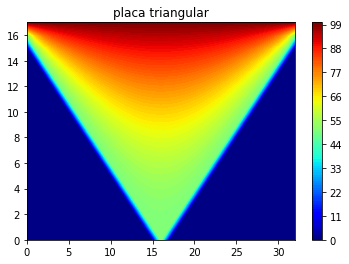

In [5]:
colorinterpolation = 100
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, L-m+1), np.arange(0, L))

# Configure the contour
plt.title("placa triangular")
plt.contourf(Y,X,P.T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")